## Quantum-Enhanced Seismic Data Processing Using Variational Quantum Classifier (VQC)

we explore a hybrid classical-quantum approach for seismic data processing using a Variational Quantum Classifier (VQC). We aim to predict acoustic impedance from normalized seismic traces, leveraging quantum computing for potentially improved model performance.

## Seismic Trace and Ricker Wavelet
- Seismic Trace: A seismic trace records the reflection of seismic waves from subsurface structures. It is essential for determining subsurface properties. In our context, we have a seismic trace that has been normalized for further analysis.

- Ricker Wavelet: This is a commonly used wavelet in seismic data processing, known for its bell-shaped curve, which helps in identifying the reflections of subsurface layers.

The Ricker wavelet $W(t)$ is given by:

\begin{equation}
W(t) = \left(1 - 2\pi^2 f^2 t^2\right) \exp\left(-\pi^2 f^2 t^2\right)
\end{equation}

where $f$ is the peak frequency and $t$ is the time. The wavelet's shape helps in filtering and analyzing seismic data.

## Data Preparation and Normalization}

- {Data Normalization}

Normalization scales data to a range, making it suitable for model input. We use Min-Max normalization for our seismic trace and impedance data:

\begin{equation}
x_{\text{norm}} = \frac{x - x_{\text{min}}}{x_{\text{max}} - x_{\text{min}}}
\end{equation}

where $x$ is the original data, and $x_{\text{min}}$ and $x_{\text{max}}$ are the minimum and maximum values of the data, respectively.

The quantum circuit used is a Variational Quantum Circuit (VQC). It combines classical and quantum methods to improve model efficiency.

- {Angle Embedding:} Encodes classical data into quantum states. For input data $x$, the quantum state $|\psi\rangle$ is prepared as:
    \begin{equation}
    |\psi\rangle = U(x)|0\rangle
    \end{equation}

    where $U(x)$ is a unitary operation parameterized by $x$.
    
- {Entangling Layers:} Apply layers of entangling gates to create complex correlations between qubits. This is done using parameterized unitary operations to adjust the model based on the data.
    
- {Observable Measurement:} Measures the expectation value of observables (Pauli-Z operators) to infer data characteristics:
    \begin{equation}
    \langle \psi | \text{PauliZ}_i | \psi \rangle
    \end{equation}

    where $\text{PauliZ}_i$ is the Pauli-Z operator on qubit $i$.




The Enhanced Variational Quantum Classifier (VQC) combines quantum circuits with classical neural network layers to achieve improved model performance. The architecture is defined as follows:

## Variational Quantum Circuit

The quantum circuit is defined by the function `variational_circuit`, which is parameterized by input data and weights:

\begin{equation}
\text{variational\_circuit}(\text{inputs}, \text{weights}) = \left[ \text{qml.expval}(\text{qml.PauliZ}(i)) \mid i \in \{0, \ldots, n_{\text{qubits}}-1\} \right]
\end{equation}

where `qml.templates.AngleEmbedding` encodes classical data into quantum states, and `qml.templates.StronglyEntanglingLayers` applies entangling layers to introduce complex correlations between qubits.

## Quantum Node

The quantum node is defined using Pennylane's `qml.qnn.TorchLayer`:

\begin{equation}
\text{vqc\_layer} = \text{qml.qnn.TorchLayer}(\text{qml.QNode}(\text{variational\_circuit}, \text{dev}, \text{interface}="torch", \text{diff\_method}="backprop"), \text{weight\_shapes})
\end{equation}

where `weight_shapes` is a dictionary defining the shape of the weights:

\begin{equation}
\text{weight\_shapes} = \{ "weights": (5, n_{\text{qubits}}, 3) \}
\end{equation}

\subsection*{3. Quantum Neural Network Architecture}

The quantum neural network is implemented as a PyTorch module `VQCNN`:


The quantum layer (`self.vqc_layer`) is responsible for processing the input data through the variational quantum circuit, producing quantum features:

\begin{equation}
\text{output} = \text{vqc\_layer}(\text{inputs})
\end{equation}


Following the quantum layer, the classical neural network layers are applied:

- {Fully Connected Layer 1:} Transforms quantum features to a hidden layer of 32 units:
    \begin{equation}
    h_1 = \text{ReLU}(W_1 \cdot \text{output} + b_1)
    \end{equation}

    where $W_1$ and $b_1$ are the weights and biases of the first fully connected layer.
    
- {Fully Connected Layer 2:} Further processes the features to a hidden layer of 16 units:
    \begin{equation}
    h_2 = \text{ReLU}(W_2 \cdot h_1 + b_2)
    \end{equation}

    where $W_2$ and $b_2$ are the weights and biases of the second fully connected layer.
    
- {Output Layer:} Produces the final prediction:
    \begin{equation}
    \hat{y} = \text{Sigmoid}(W_3 \cdot h_2 + b_3)
    \end{equation}

    where $W_3$ and $b_3$ are the weights and biases of the output layer, and $\text{Sigmoid}$ is the activation function used for the final prediction.


## Quantum Neural Network Architecture

The network consists of:

- {Quantum Layer:} Encodes data into quantum states and applies variational circuits.
    
- {Classical Layers:} Traditional neural network layers (fully connected) for further processing of quantum outputs.
    
- {Fully Connected Layers:} Used to transform quantum features into predictions. These layers apply weights $W$ and biases $b$ to the data:
    \begin{equation}
    y = \sigma(Wx + b)
    \end{equation}
    
    where $\sigma$ is the activation function (e.g., ReLU or Sigmoid).


## Training and Optimization

The model is trained using the Mean Squared Error (MSE) loss function, which measures the difference between predicted and true values:

\begin{equation}
\text{MSE} = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2
\end{equation}

where $y_i$ is the true value, and $\hat{y}_i$ is the predicted value.

{Optimizer:} Adam optimizer adjusts the weights of the network based on gradients computed via backpropagation.
    
{Learning Rate Scheduler:} Adjusts the learning rate during training to ensure stable convergence.

## Evaluation Metrics

- {Mean Squared Error (MSE):} Measures the average squared difference between predicted and actual values. Lower MSE indicates better performance.

- {R-squared (R²) Score:} Indicates the proportion of variance in the dependent variable that is predictable from the independent variables. A higher R² indicates a better fit.

    \begin{equation}
    R^2 = 1 - \frac{\sum (y_i - \hat{y}_i)^2}{\sum (y_i - \bar{y})^2}
    \end{equation}

    where $\bar{y}$ is the mean of the true values.

- {Mean Absolute Error (MAE):} Measures the average magnitude of errors without considering their direction. It’s the average of the absolute differences between predicted and true values.

    \begin{equation}
    \text{MAE} = \frac{1}{n} \sum_{i=1}^n |y_i - \hat{y}_i|
    \end{equation}

- {Accuracy:} Custom metric measuring the percentage of predictions within a specific threshold of the true values.

    \begin{equation}
    \text{Accuracy} = \frac{\text{Number of correct predictions}}{\text{Total number of predictions}} \times 100\%
    \end{equation}

Epoch 1/50, Loss: 0.0757870189845562
Epoch 2/50, Loss: 0.09141070147355397
Epoch 3/50, Loss: 0.07840530574321747
Epoch 4/50, Loss: 0.06979161997636159
Epoch 5/50, Loss: 0.0783384529252847
Epoch 6/50, Loss: 0.07145003353555997
Epoch 7/50, Loss: 0.065649239346385
Epoch 8/50, Loss: 0.06080798773715893
Epoch 9/50, Loss: 0.05882284254767001
Epoch 10/50, Loss: 0.059345135310043894
Epoch 11/50, Loss: 0.05772283463738859
Epoch 12/50, Loss: 0.06505717771748702
Epoch 13/50, Loss: 0.06518391085167725
Epoch 14/50, Loss: 0.057085542830463964
Epoch 15/50, Loss: 0.05699673191217395
Epoch 16/50, Loss: 0.05992298200726509
Epoch 17/50, Loss: 0.06150840626408657
Epoch 18/50, Loss: 0.059184168465435505
Epoch 19/50, Loss: 0.06135355246563753
Epoch 20/50, Loss: 0.07566518957416217
Epoch 21/50, Loss: 0.058941349076728024
Epoch 22/50, Loss: 0.058257532150795065
Epoch 23/50, Loss: 0.07164210515717666
Epoch 24/50, Loss: 0.05701504911606511
Epoch 25/50, Loss: 0.0760627742856741
Epoch 26/50, Loss: 0.0833834869166

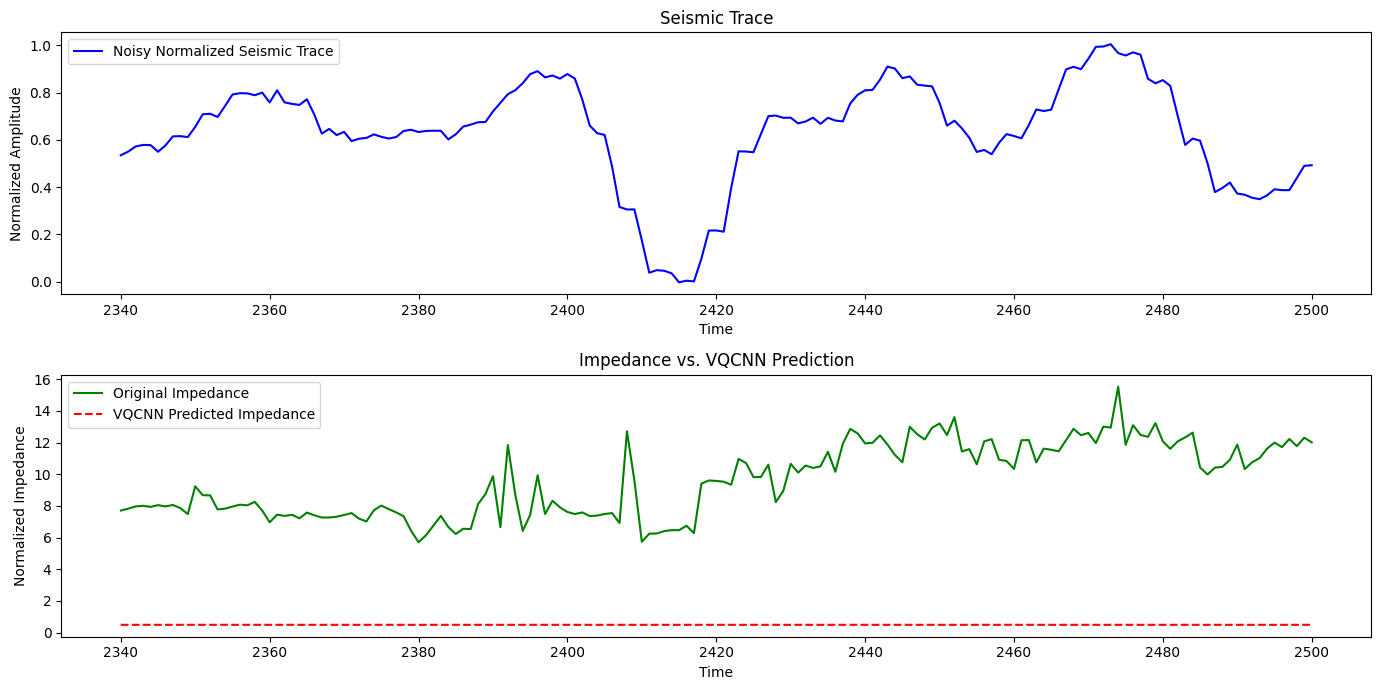

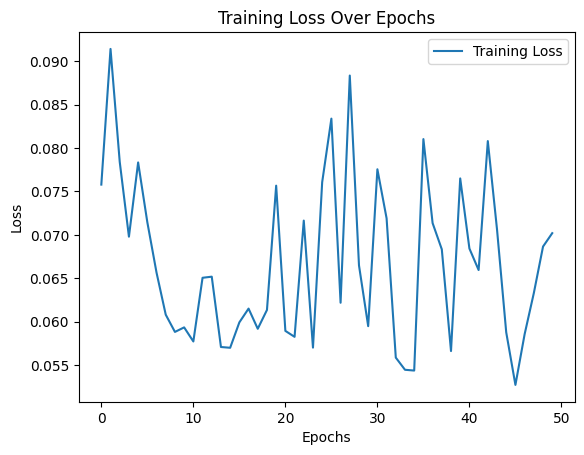

Root Mean Squared Error (RMSE): 9.4092


In [3]:
import pennylane as qml
import numpy as np
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Load and preprocess seismic data
seismic_data = np.genfromtxt('seismic_trace_15_9_F-15-A.csv', delimiter=';')
time_seismic = -np.round(seismic_data[:, 0])
time_seismic, unique_indices = np.unique(time_seismic, return_index=True)
dt_seismic = time_seismic[1] - time_seismic[0]
seismic_trace = seismic_data[unique_indices, 1]
Ip_trace = seismic_data[unique_indices, 2]

start_time = 2340.0
end_time = 2500.0

seismic_trace_cropped = seismic_trace[np.where((time_seismic >= start_time) & (time_seismic <= end_time))]
Ip_trace_cropped = Ip_trace[np.where((time_seismic >= start_time) & (time_seismic <= end_time))]
time_cropped = time_seismic[np.where((time_seismic >= start_time) & (time_seismic <= end_time))]

source_statistical = np.genfromtxt('statistical_source_wavelet.txt', delimiter='\t')
dt_source = 1e-3

# Data normalization
scaler_seismic = MinMaxScaler()
seismic_trace_cropped_normalized = scaler_seismic.fit_transform(seismic_trace_cropped.reshape(-1, 1)).flatten()

scaler_ip = MinMaxScaler()
Ip_trace_cropped_normalized = scaler_ip.fit_transform(Ip_trace_cropped.reshape(-1, 1)).flatten()

# Add noise to seismic data
def add_seismic_noise(data, noise_level=0.01):
    noise = np.random.normal(0, noise_level, size=data.shape)
    return data + noise

# Add noise to seismic data
noise_level = 0.01  # Adjust as needed
seismic_trace_cropped_noisy = add_seismic_noise(seismic_trace_cropped_normalized, noise_level)

# Quantum device setup
n_qubits = 4
dev = qml.device("default.qubit", wires=n_qubits)

# Define quantum convolutional layer with StronglyEntanglingLayers
def quantum_conv_layer(inputs, weights):
    qml.templates.AngleEmbedding(inputs, wires=range(n_qubits))
    qml.templates.StronglyEntanglingLayers(weights, wires=range(n_qubits))
    return [qml.expval(qml.PauliZ(i)) for i in range(n_qubits)]

# Define the quantum node and layer
weight_shapes = {"weights": (3, n_qubits, 3)}
qlayer = qml.qnn.TorchLayer(qml.QNode(quantum_conv_layer, dev, interface="torch", diff_method="parameter-shift"), weight_shapes)

# Define the VQCNN model
class VQCNN(torch.nn.Module):
    def __init__(self):
        super(VQCNN, self).__init__()
        self.qlayer1 = qlayer
        self.fc1 = torch.nn.Linear(n_qubits, 32)  # Increase width
        self.fc2 = torch.nn.Linear(32, 16)  # Increase width
        self.fc3 = torch.nn.Linear(16, 1)  # Output layer

    def forward(self, x):
        x = self.qlayer1(x)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return x

# Prepare data for PyTorch
seismic_data_tensor = torch.tensor(seismic_trace_cropped_noisy, dtype=torch.float32).unsqueeze(1)
Ip_data_tensor = torch.tensor(Ip_trace_cropped_normalized, dtype=torch.float32).unsqueeze(1)

dataset = TensorDataset(seismic_data_tensor, Ip_data_tensor)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Model, loss function, and optimizer
model = VQCNN()
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

# Training loop
num_epochs = 50
train_losses = []

for epoch in range(num_epochs):
    epoch_loss = 0
    for batch in dataloader:
        seismic, impedance = batch
        optimizer.zero_grad()
        output = model(seismic)
        loss = criterion(output, impedance)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    train_losses.append(epoch_loss / len(dataloader))
    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {epoch_loss / len(dataloader)}")

# Save the trained model
torch.save(model.state_dict(), 'vqc_model.pth')

# Load the trained model
model.load_state_dict(torch.load('vqc_model.pth'))
model.eval()

# Evaluate on training data
with torch.no_grad():
    predicted_ip = model(seismic_data_tensor).numpy().flatten()

# Reverse normalization for plotting
seismic_trace_cropped_noisy = scaler_seismic.inverse_transform(seismic_trace_cropped_noisy.reshape(-1, 1)).flatten()
Ip_trace_cropped_normalized = scaler_ip.inverse_transform(Ip_trace_cropped_normalized.reshape(-1, 1)).flatten()

# Plot the seismic traces and impedances
plt.figure(figsize=(14, 7))

# Seismic Trace
plt.subplot(2, 1, 1)
plt.plot(time_cropped, seismic_trace_cropped_noisy, label='Noisy Normalized Seismic Trace', color='blue')
plt.xlabel('Time')
plt.ylabel('Normalized Amplitude')
plt.title('Seismic Trace')
plt.legend()

# VQCNN Prediction
plt.subplot(2, 1, 2)
plt.plot(time_cropped, Ip_trace_cropped_normalized, label='Original Impedance', color='green')
plt.plot(time_cropped, predicted_ip, label='VQCNN Predicted Impedance', color='red', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Normalized Impedance')
plt.title('Impedance vs. VQCNN Prediction')
plt.legend()

plt.tight_layout()
plt.show()

# Plot training loss
plt.figure()
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training Loss Over Epochs')
plt.show()

# Post-selection metrics (e.g., RMSE)
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(Ip_trace_cropped_normalized, predicted_ip))
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 1/10, Train Loss: 0.08033083130915959, Val Loss: 0.08723734319210052
Epoch 2/10, Train Loss: 0.08023408303658168, Val Loss: 0.08710424602031708
Epoch 3/10, Train Loss: 0.08013566583395004, Val Loss: 0.08697034418582916
Epoch 4/10, Train Loss: 0.08003593484560649, Val Loss: 0.0868365541100502
Epoch 5/10, Train Loss: 0.07993189245462418, Val Loss: 0.08670302480459213
Epoch 6/10, Train Loss: 0.0798402950167656, Val Loss: 0.08656855672597885
Epoch 7/10, Train Loss: 0.07973440488179524, Val Loss: 0.0864352136850357
Epoch 8/10, Train Loss: 0.07963531464338303, Val Loss: 0.08630303293466568
Epoch 9/10, Train Loss: 0.0795406053463618, Val Loss: 0.08617063611745834
Epoch 10/10, Train Loss: 0.07944188763697942, Val Loss: 0.08603715896606445


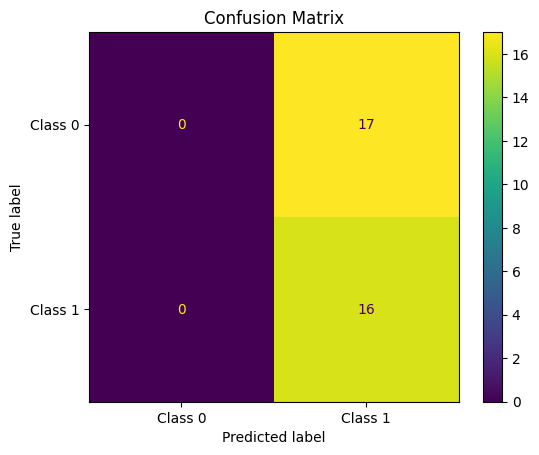

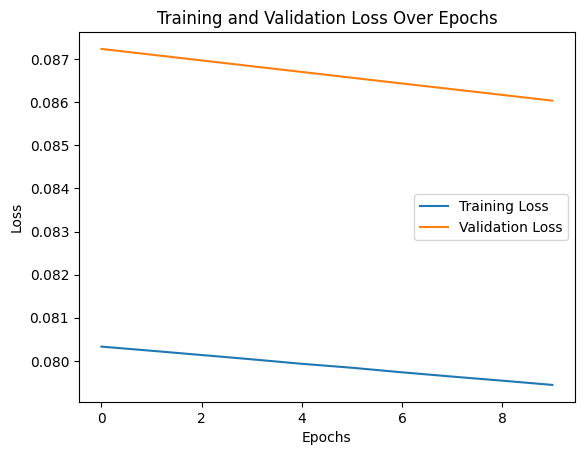

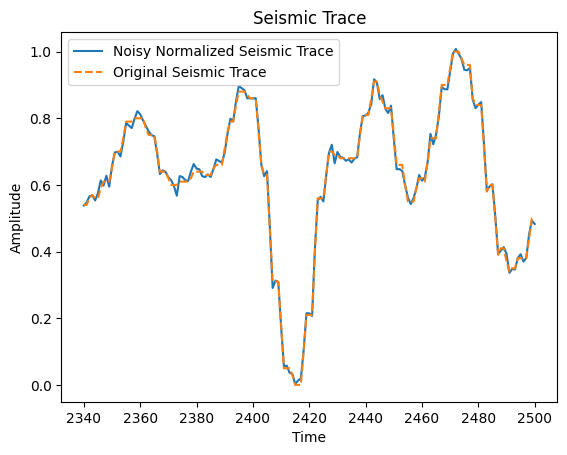

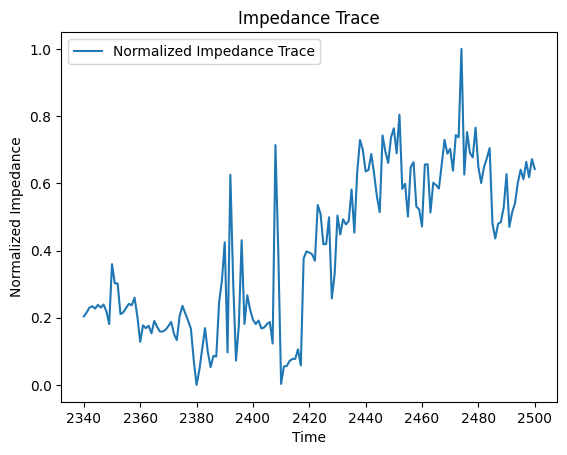

In [8]:
import pennylane as qml
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import torch
from torch.utils.data import Dataset, DataLoader, TensorDataset
import torch.optim as optim
import torch.nn as nn

# Load and preprocess seismic data
seismic_data = np.genfromtxt('seismic_trace_15_9_F-15-A.csv', delimiter=';')
time_seismic = -np.round(seismic_data[:, 0])
time_seismic, unique_indices = np.unique(time_seismic, return_index=True)
seismic_trace = seismic_data[unique_indices, 1]
Ip_trace = seismic_data[unique_indices, 2]

start_time = 2340.0
end_time = 2500.0

seismic_trace_cropped = seismic_trace[np.where((time_seismic >= start_time) & (time_seismic <= end_time))]
Ip_trace_cropped = Ip_trace[np.where((time_seismic >= start_time) & (time_seismic <= end_time))]
time_cropped = time_seismic[np.where((time_seismic >= start_time) & (time_seismic <= end_time))]

# Data normalization
scaler_seismic = MinMaxScaler()
seismic_trace_cropped_normalized = scaler_seismic.fit_transform(seismic_trace_cropped.reshape(-1, 1)).flatten()

scaler_ip = MinMaxScaler()
Ip_trace_cropped_normalized = scaler_ip.fit_transform(Ip_trace_cropped.reshape(-1, 1)).flatten()

# Add noise to seismic data
def add_seismic_noise(data, noise_level=0.01):
    noise = np.random.normal(0, noise_level, size=data.shape)
    return data + noise

# Add noise to seismic data
noise_level = 0.01
seismic_trace_cropped_noisy = add_seismic_noise(seismic_trace_cropped_normalized, noise_level)

# Data splitting
X = seismic_trace_cropped_noisy.reshape(-1, 1)
y = Ip_trace_cropped_normalized
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Create datasets and dataloaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Quantum device setup
n_qubits = 4
dev = qml.device("default.qubit", wires=n_qubits)

# Quantum convolutional layer with StronglyEntanglingLayers
def quantum_conv_layer(inputs, weights):
    qml.templates.AngleEmbedding(inputs, wires=range(n_qubits))
    qml.templates.StronglyEntanglingLayers(weights, wires=range(n_qubits))
    return [qml.expval(qml.PauliZ(i)) for i in range(n_qubits)]

# Define quantum node
weight_shapes = {"weights": (3, n_qubits, 3)}
qlayer = qml.qnn.TorchLayer(qml.QNode(quantum_conv_layer, dev, interface="torch", diff_method="parameter-shift"), weight_shapes)

# Define the Variational Quantum Classifier (VQC) model
class VQCNN(nn.Module):
    def __init__(self):
        super(VQCNN, self).__init__()
        self.qlayer1 = qlayer
        self.fc1 = nn.Linear(n_qubits, 16)
        self.fc2 = nn.Linear(16, 1)

    def forward(self, x):
        x = self.qlayer1(x)
        x = torch.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x

# Instantiate model, loss function, and optimizer
model = VQCNN()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Training loop
num_epochs = 10
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    for batch in train_loader:
        seismic, impedance = batch
        optimizer.zero_grad()
        output = model(seismic)
        loss = criterion(output, impedance)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    train_losses.append(epoch_loss / len(train_loader))

    model.eval()
    val_loss = 0
    with torch.no_grad():
        for batch in val_loader:
            seismic, impedance = batch
            output = model(seismic)
            loss = criterion(output, impedance)
            val_loss += loss.item()

    val_losses.append(val_loss / len(val_loader))
    print(f"Epoch {epoch + 1}/{num_epochs}, Train Loss: {epoch_loss / len(train_loader)}, Val Loss: {val_loss / len(val_loader)}")

# Save the trained model
torch.save(model.state_dict(), 'vqc_model.pth')

# Load the trained model
model.load_state_dict(torch.load('vqc_model.pth'))
model.eval()

# Evaluate on the test set
y_true = []
y_pred = []
with torch.no_grad():
    for batch in test_loader:
        seismic, impedance = batch
        output = model(seismic)
        y_true.extend(impedance.numpy())
        y_pred.extend(output.numpy())

y_true = np.array(y_true).flatten()
y_pred = np.array(y_pred).flatten()



# Confusion matrix
y_true_binary = (y_true > 0.5).astype(int)
y_pred_binary = (y_pred > 0.5).astype(int)
conf_matrix = confusion_matrix(y_true_binary, y_pred_binary)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=['Class 0', 'Class 1'])
disp.plot()
plt.title('Confusion Matrix')
plt.show()

# Plot training and validation losses
plt.figure()
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss Over Epochs')
plt.show()

# Plot the seismic traces
plt.figure()
plt.plot(time_cropped, seismic_trace_cropped_noisy, label='Noisy Normalized Seismic Trace')
plt.plot(time_cropped, scaler_seismic.inverse_transform(seismic_trace_cropped.reshape(-1, 1)).flatten(), label='Original Seismic Trace', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.title('Seismic Trace')
plt.show()

# Plot the impedance traces
plt.figure()
plt.plot(time_cropped, Ip_trace_cropped_normalized, label='Normalized Impedance Trace')
plt.xlabel('Time')
plt.ylabel('Normalized Impedance')
plt.legend()
plt.title('Impedance Trace')
plt.show()


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 1/10, Train Loss: 0.05743016550938288, Val Loss: 0.05211658775806427
Epoch 2/10, Train Loss: 0.0573868602514267, Val Loss: 0.052058715373277664
Epoch 3/10, Train Loss: 0.05737448235352834, Val Loss: 0.051988668739795685
Epoch 4/10, Train Loss: 0.05733649060130119, Val Loss: 0.05192577838897705
Epoch 5/10, Train Loss: 0.05730320140719414, Val Loss: 0.051867131143808365
Epoch 6/10, Train Loss: 0.05728820959726969, Val Loss: 0.05180053040385246
Epoch 7/10, Train Loss: 0.057254341741402946, Val Loss: 0.0517381876707077
Epoch 8/10, Train Loss: 0.05723374833663305, Val Loss: 0.05167045444250107
Epoch 9/10, Train Loss: 0.05721197401483854, Val Loss: 0.051601774990558624
Epoch 10/10, Train Loss: 0.05718023702502251, Val Loss: 0.05153878778219223


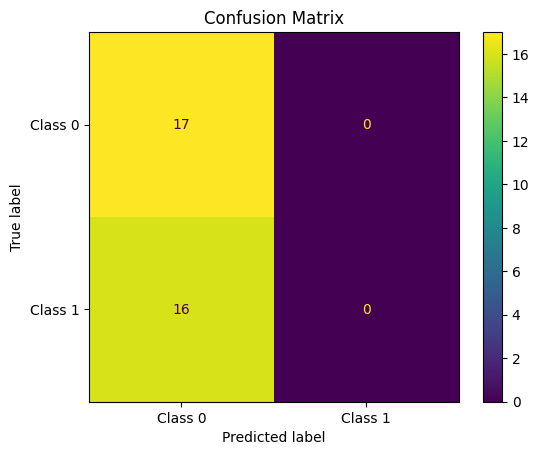

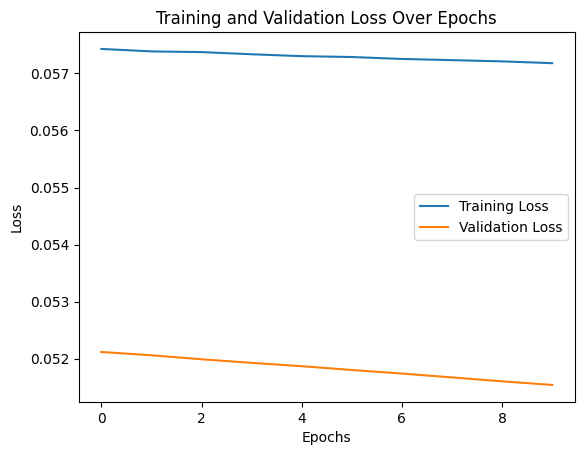

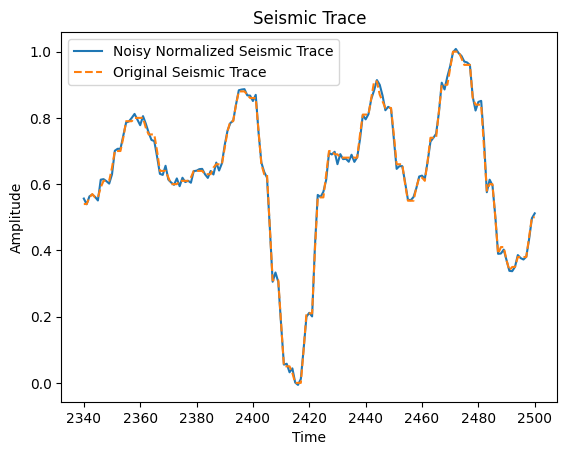

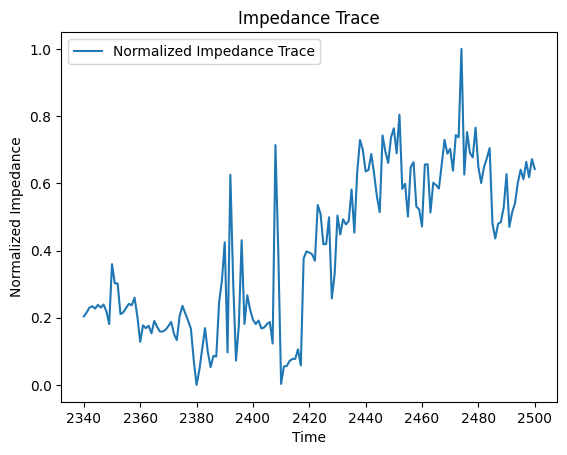

In [11]:
import pennylane as qml
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader, TensorDataset
import torch.optim as optim
import torch.nn as nn

# Define quantum device and circuit
NUM_WIRES = 3
NUM_LAYERS = 2

dev = qml.device("default.qubit", wires=NUM_WIRES)

@qml.qnode(dev, interface='torch', diff_method='parameter-shift')
def quantum_circuit(params, x):
    x_embedded = [i * np.pi for i in x]
    for i in range(NUM_WIRES):
        qml.RX(x_embedded[i], wires=i)
        qml.Rot(*params[0, i], wires=i)

    qml.CZ(wires=[1, 0])
    qml.CZ(wires=[1, 2])
    qml.CZ(wires=[0, 2])

    for i in range(NUM_WIRES):
        qml.Rot(*params[1, i], wires=i)

    return [qml.expval(qml.PauliZ(i)) for i in range(NUM_WIRES)]

def quantum_conv_layer(inputs, weights):
    qml.templates.AngleEmbedding(inputs, wires=range(NUM_WIRES))
    qml.templates.StronglyEntanglingLayers(weights, wires=range(NUM_WIRES))
    return [qml.expval(qml.PauliZ(i)) for i in range(NUM_WIRES)]

# Define the Variational Quantum Convolutional Neural Network (VQCNN) model
class VQCNN(nn.Module):
    def __init__(self):
        super(VQCNN, self).__init__()
        self.qlayer = qml.qnn.TorchLayer(qml.QNode(quantum_conv_layer, dev, interface="torch", diff_method="parameter-shift"), weight_shapes={"weights": (NUM_LAYERS, NUM_WIRES, 3)})
        self.fc1 = nn.Linear(NUM_WIRES, 16)
        self.fc2 = nn.Linear(16, 1)

    def forward(self, x):
        x = self.qlayer(x)
        x = torch.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x

# Load and preprocess seismic data
seismic_data = np.genfromtxt('seismic_trace_15_9_F-15-A.csv', delimiter=';')
time_seismic = -np.round(seismic_data[:, 0])
time_seismic, unique_indices = np.unique(time_seismic, return_index=True)
seismic_trace = seismic_data[unique_indices, 1]
Ip_trace = seismic_data[unique_indices, 2]

start_time = 2340.0
end_time = 2500.0

seismic_trace_cropped = seismic_trace[np.where((time_seismic >= start_time) & (time_seismic <= end_time))]
Ip_trace_cropped = Ip_trace[np.where((time_seismic >= start_time) & (time_seismic <= end_time))]
time_cropped = time_seismic[np.where((time_seismic >= start_time) & (time_seismic <= end_time))]

# Data normalization
scaler_seismic = MinMaxScaler()
seismic_trace_cropped_normalized = scaler_seismic.fit_transform(seismic_trace_cropped.reshape(-1, 1)).flatten()

scaler_ip = MinMaxScaler()
Ip_trace_cropped_normalized = scaler_ip.fit_transform(Ip_trace_cropped.reshape(-1, 1)).flatten()

# Add noise to seismic data
def add_seismic_noise(data, noise_level=0.01):
    noise = np.random.normal(0, noise_level, size=data.shape)
    return data + noise

# Add noise to seismic data
noise_level = 0.01
seismic_trace_cropped_noisy = add_seismic_noise(seismic_trace_cropped_normalized, noise_level)

# Data splitting
X = seismic_trace_cropped_noisy.reshape(-1, 1)
y = Ip_trace_cropped_normalized
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Create datasets and dataloaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Instantiate model, loss function, and optimizer
model = VQCNN()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Training loop
num_epochs = 10
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    for batch in train_loader:
        seismic, impedance = batch
        optimizer.zero_grad()
        output = model(seismic)
        loss = criterion(output, impedance)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    train_losses.append(epoch_loss / len(train_loader))

    model.eval()
    val_loss = 0
    with torch.no_grad():
        for batch in val_loader:
            seismic, impedance = batch
            output = model(seismic)
            loss = criterion(output, impedance)
            val_loss += loss.item()

    val_losses.append(val_loss / len(val_loader))
    print(f"Epoch {epoch + 1}/{num_epochs}, Train Loss: {epoch_loss / len(train_loader)}, Val Loss: {val_loss / len(val_loader)}")

# Save the trained model
torch.save(model.state_dict(), 'vqc_model.pth')

# Load the trained model
model.load_state_dict(torch.load('vqc_model.pth'))
model.eval()

# Evaluate on the test set
y_true = []
y_pred = []
with torch.no_grad():
    for batch in test_loader:
        seismic, impedance = batch
        output = model(seismic)
        y_true.extend(impedance.numpy())
        y_pred.extend(output.numpy())

y_true = np.array(y_true).flatten()
y_pred = np.array(y_pred).flatten()

# Confusion matrix
y_true_binary = (y_true > 0.5).astype(int)
y_pred_binary = (y_pred > 0.5).astype(int)
conf_matrix = confusion_matrix(y_true_binary, y_pred_binary)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=['Class 0', 'Class 1'])
disp.plot()
plt.title('Confusion Matrix')
plt.show()

# Plot training and validation losses
plt.figure()
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss Over Epochs')
plt.show()

# Plot the seismic traces
plt.figure()
plt.plot(time_cropped, seismic_trace_cropped_noisy, label='Noisy Normalized Seismic Trace')
plt.plot(time_cropped, scaler_seismic.inverse_transform(seismic_trace_cropped.reshape(-1, 1)).flatten(), label='Original Seismic Trace', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.title('Seismic Trace')
plt.show()

# Plot the impedance traces
plt.figure()
plt.plot(time_cropped, Ip_trace_cropped_normalized, label='Normalized Impedance Trace')
plt.xlabel('Time')
plt.ylabel('Normalized Impedance')
plt.legend()
plt.title('Impedance Trace')
plt.show()


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 1/10, Train Loss: 0.05670738220214844, Val Loss: 0.050315093249082565
Epoch 2/10, Train Loss: 0.056687094271183014, Val Loss: 0.05025486648082733
Epoch 3/10, Train Loss: 0.05666304628054301, Val Loss: 0.050195030868053436
Epoch 4/10, Train Loss: 0.05664197852214178, Val Loss: 0.05013998597860336
Epoch 5/10, Train Loss: 0.0566289946436882, Val Loss: 0.05009142681956291
Epoch 6/10, Train Loss: 0.056608401238918304, Val Loss: 0.05004101246595383
Epoch 7/10, Train Loss: 0.05658979341387749, Val Loss: 0.049991119652986526
Epoch 8/10, Train Loss: 0.05657615885138512, Val Loss: 0.049942634999752045
Epoch 9/10, Train Loss: 0.056555615117152534, Val Loss: 0.04989975690841675
Epoch 10/10, Train Loss: 0.05654269829392433, Val Loss: 0.04985605925321579
Training Accuracy: 0.6042
Test Accuracy: 0.5152


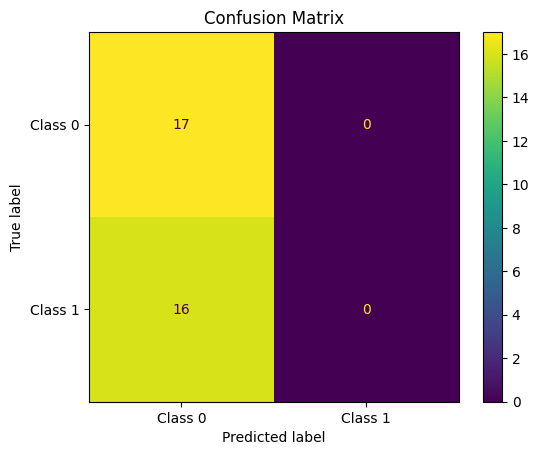

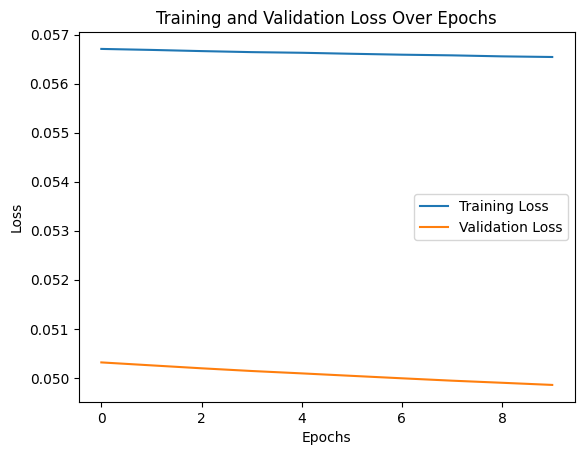

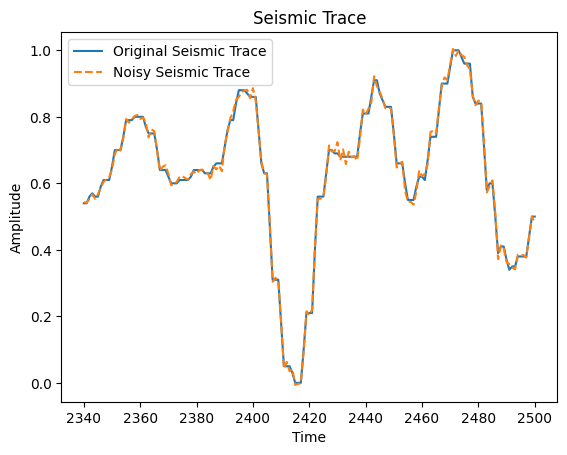

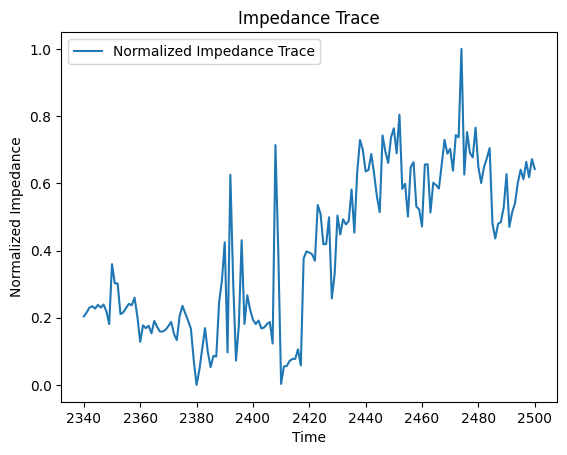

In [18]:
import pennylane as qml
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import torch
from torch.utils.data import Dataset, DataLoader, TensorDataset
import torch.optim as optim
import torch.nn as nn

# Define quantum device and circuit
NUM_WIRES = 3
NUM_LAYERS = 2

dev = qml.device("default.qubit", wires=NUM_WIRES)

@qml.qnode(dev, interface='torch', diff_method='parameter-shift')
def quantum_circuit(params, x):
    x_embedded = [i * np.pi for i in x]
    for i in range(NUM_WIRES):
        qml.RX(x_embedded[i], wires=i)
        qml.Rot(*params[0, i], wires=i)

    qml.CZ(wires=[1, 0])
    qml.CZ(wires=[1, 2])
    qml.CZ(wires=[0, 2])

    for i in range(NUM_WIRES):
        qml.Rot(*params[1, i], wires=i)

    return [qml.expval(qml.PauliZ(i)) for i in range(NUM_WIRES)]

def quantum_conv_layer(inputs, weights):
    qml.templates.AngleEmbedding(inputs, wires=range(NUM_WIRES))
    qml.templates.StronglyEntanglingLayers(weights, wires=range(NUM_WIRES))
    return [qml.expval(qml.PauliZ(i)) for i in range(NUM_WIRES)]

# Define the Variational Quantum Convolutional Neural Network (VQCNN) model
class VQCNN(nn.Module):
    def __init__(self):
        super(VQCNN, self).__init__()
        self.qlayer = qml.qnn.TorchLayer(qml.QNode(quantum_conv_layer, dev, interface="torch", diff_method="parameter-shift"), weight_shapes={"weights": (NUM_LAYERS, NUM_WIRES, 3)})
        self.fc1 = nn.Linear(NUM_WIRES, 16)
        self.fc2 = nn.Linear(16, 1)

    def forward(self, x):
        x = self.qlayer(x)
        x = torch.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x

# Load and preprocess seismic data
seismic_data = np.genfromtxt('seismic_trace_15_9_F-15-A.csv', delimiter=';')
time_seismic = -np.round(seismic_data[:, 0])
time_seismic, unique_indices = np.unique(time_seismic, return_index=True)
seismic_trace = seismic_data[unique_indices, 1]
Ip_trace = seismic_data[unique_indices, 2]

start_time = 2340.0
end_time = 2500.0

seismic_trace_cropped = seismic_trace[np.where((time_seismic >= start_time) & (time_seismic <= end_time))]
Ip_trace_cropped = Ip_trace[np.where((time_seismic >= start_time) & (time_seismic <= end_time))]
time_cropped = time_seismic[np.where((time_seismic >= start_time) & (time_seismic <= end_time))]

# Data normalization
scaler_seismic = MinMaxScaler()
seismic_trace_cropped_normalized = scaler_seismic.fit_transform(seismic_trace_cropped.reshape(-1, 1)).flatten()

scaler_ip = MinMaxScaler()
Ip_trace_cropped_normalized = scaler_ip.fit_transform(Ip_trace_cropped.reshape(-1, 1)).flatten()

# Add noise to seismic data
def add_seismic_noise(data, noise_level=0.01):
    noise = np.random.normal(0, noise_level, size=data.shape)
    return data + noise

# Add noise to seismic data
noise_level = 0.01
seismic_trace_cropped_noisy = add_seismic_noise(seismic_trace_cropped_normalized, noise_level)

# Data splitting
X = seismic_trace_cropped_noisy.reshape(-1, 1)
y = Ip_trace_cropped_normalized
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Create datasets and dataloaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Instantiate model, loss function, and optimizer
model = VQCNN()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Training loop
num_epochs = 10
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    for batch in train_loader:
        seismic, impedance = batch
        optimizer.zero_grad()
        output = model(seismic)
        loss = criterion(output, impedance)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    train_losses.append(epoch_loss / len(train_loader))

    model.eval()
    val_loss = 0
    with torch.no_grad():
        for batch in val_loader:
            seismic, impedance = batch
            output = model(seismic)
            loss = criterion(output, impedance)
            val_loss += loss.item()

    val_losses.append(val_loss / len(val_loader))
    print(f"Epoch {epoch + 1}/{num_epochs}, Train Loss: {epoch_loss / len(train_loader)}, Val Loss: {val_loss / len(val_loader)}")

# Save the trained model
torch.save(model.state_dict(), 'vqc_model.pth')

# Load the trained model
model.load_state_dict(torch.load('vqc_model.pth'))
model.eval()

# Evaluate on the test set
y_true = []
y_pred = []
with torch.no_grad():
    for batch in test_loader:
        seismic, impedance = batch
        output = model(seismic)
        y_true.extend(impedance.numpy())
        y_pred.extend(output.numpy())

y_true = np.array(y_true).flatten()
y_pred = np.array(y_pred).flatten()

# Print training and test accuracy
y_train_pred = []
with torch.no_grad():
    for batch in train_loader:
        seismic, impedance = batch
        output = model(seismic)
        y_train_pred.extend(output.numpy())

y_train_pred = np.array(y_train_pred).flatten()
train_accuracy = accuracy_score((y_train > 0.5).astype(int), (y_train_pred > 0.5).astype(int))
test_accuracy = accuracy_score((y_true > 0.5).astype(int), (y_pred > 0.5).astype(int))

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Confusion matrix
y_true_binary = (y_true > 0.5).astype(int)
y_pred_binary = (y_pred > 0.5).astype(int)
conf_matrix = confusion_matrix(y_true_binary, y_pred_binary)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=['Class 0', 'Class 1'])
disp.plot()
plt.title('Confusion Matrix')
plt.show()

# Plot training and validation losses
plt.figure()
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss Over Epochs')
plt.show()

# Plot the seismic traces
plt.figure()
plt.plot(time_cropped, scaler_seismic.inverse_transform(seismic_trace_cropped.reshape(-1, 1)).flatten(), label='Original Seismic Trace')
plt.plot(time_cropped, scaler_seismic.inverse_transform(seismic_trace_cropped_noisy.reshape(-1, 1)).flatten(), label='Noisy Seismic Trace', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.title('Seismic Trace')
plt.show()

# Plot the impedance traces
plt.figure()
plt.plot(time_cropped, Ip_trace_cropped_normalized, label='Normalized Impedance Trace')
plt.xlabel('Time')
plt.ylabel('Normalized Impedance')
plt.legend()
plt.title('Impedance Trace')
plt.show()
